In [3]:
import sys
sys.path.append('/home/dgotzens/scripts')
from timedataparser import load_all
import tools, torch
from matplotlib import pyplot as plt

loaded data with shape torch.Size([1022, 192, 983])


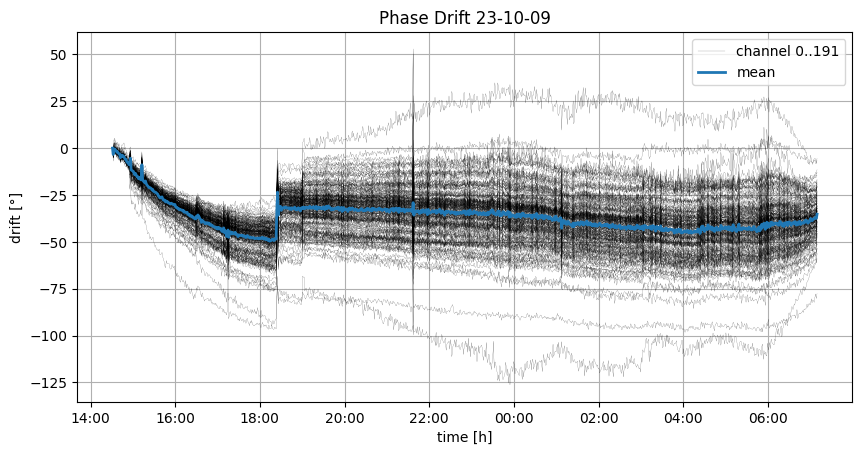

In [6]:
header,time,data,temperature = load_all(f'/home/dgotzens/recording/23-10-09/')
nfft = 2**12
data = tools.rangedata(data, N=nfft)
M,K,L = data.shape

search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(data.mean(1),search_idx)
drift = torch.empty((K,L), dtype=torch.cfloat)
for k in range(K):
    print(f'plotting channel {k}', end='\r')
    drift[k,:] = tools.drift(data[:,k,:], m_refl)
    if k==0:
        plt.plot(time, 180/torch.pi * tools.unwrap(drift[k,:].angle()), color='k', linewidth=0.1, label='channel 0..191')
    else:
        plt.plot(time, 180/torch.pi * tools.unwrap(drift[k,:].angle()), color='k', linewidth=0.1)
plt.plot(time, 180/torch.pi * tools.unwrap(drift.angle()).mean(0),linewidth=2, label='mean') 

plt.ylabel('drift [°]')
plt.xlabel('time [h]')
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.grid()
plt.gcf().set_figwidth(10)
plt.title('Phase Drift 23-10-09')
plt.legend()
plt.show()

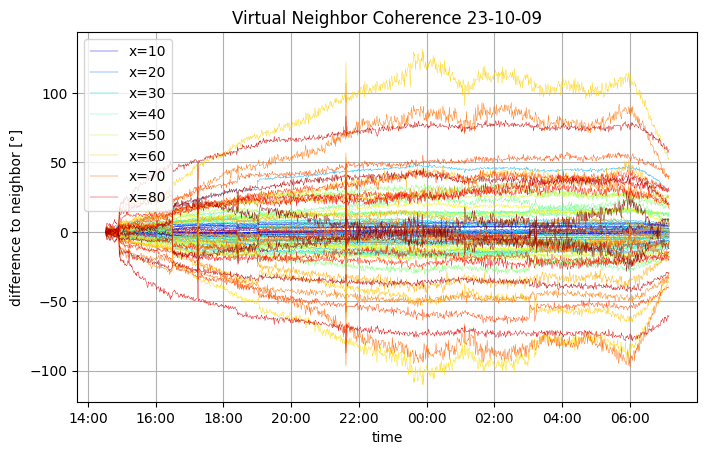

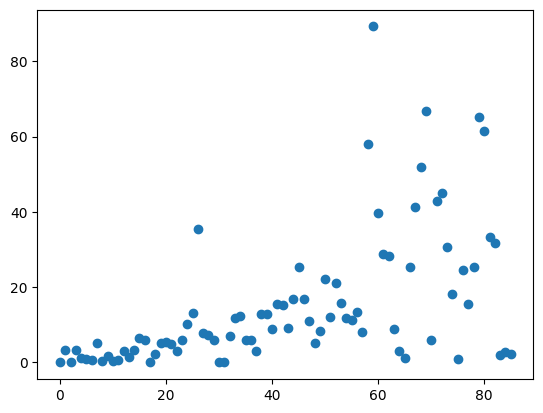

In [5]:
from matplotlib import cm

x_pos,y_pos = tools.array_pos(header)
X = max(x_pos)+1
ids = [min(\
            [x_pos.index(x, k) \
            for k in range(K) \
            if y_pos[k]==0 and x in x_pos[k:]]\
        ) for x in range(X)]

drift = torch.empty((X,L), dtype=torch.cfloat)
for x,k in enumerate(ids):
    drift[x,:] = tools.drift(data[:,k,:], m_refl)  
    col = [c/256. for c in cm.jet(x/X, bytes=True)]
    if x>0:
        dif = drift[x,:] / drift[x-1,:]
        plt.plot(time, 180/torch.pi*tools.unwrap(dif.angle()), \
                  color=col, label=None if x%10 else f'x={x}', linewidth=0.3)
    # plt.plot(dif[x,:].angle(), color=col, label=None if x%10 else x)
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.grid()
plt.xlabel('time')
plt.ylabel('difference to neighbor [°]')
plt.legend()
plt.title('Virtual Neighbor Coherence 23-10-09')
plt.gcf().set_figwidth(8)
plt.show()

23-09-22_0
loaded data with shape torch.Size([1022, 192, 42])
23-09-26
loaded data with shape torch.Size([1022, 192, 52])
23-09-27
loaded data with shape torch.Size([1022, 192, 42])
23-10-04
loaded data with shape torch.Size([1022, 192, 92])
23-10-05
loaded data with shape torch.Size([1022, 192, 51])
23-10-09
loaded data with shape torch.Size([1022, 192, 983])


/tmp/ipykernel_738945/4062140817.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


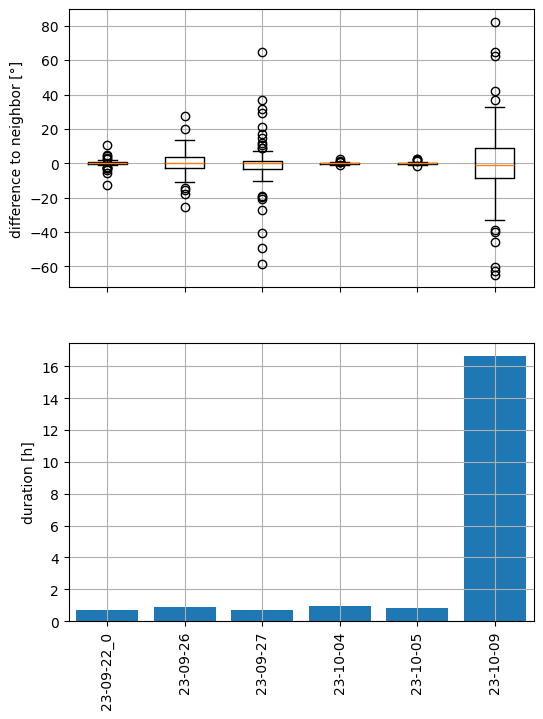

In [20]:
# dates=[f'23-09-{k}' for k in (22,'22_0',26,27,28)]
# dates+=[f'23-10-{k}' for k in ('02','04','05','09',13,31,'31_off-center')]
dates=[f'23-09-{k}' for k in ('22_0',26,27)]
dates+=[f'23-10-{k}' for k in ('04','05','09')]

mean_errors = []
durations = []
f,ax = plt.subplots(2, sharex=True)
f.set_size_inches(6, 6*1.5)


for date in dates:
    print(date)
    header,time,data,temperature,reboots = load_all(f'/home/dgotzens/localstorage/workspace/masterarbeit/recording/{date}/', True)
    M,K,L = data.shape

    # f, ax = plt.subplots(2,sharex=True)
    nfft = 2**11
    data = tools.rangedata(data, N=nfft)
    M,K,L = data.shape
    search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
    m_refl = tools.reflidx(data.mean(1),search_idx)
    x_pos,y_pos = tools.array_pos(header)
    X = max(x_pos)+1
    ids = [min(\
                [x_pos.index(x, k) \
                for k in range(K) \
                if y_pos[k]==0 and x in x_pos[k:]]\
            ) for x in range(X)]

    dif = torch.empty((X-1,L), dtype=torch.cfloat)
    for x,k in enumerate(ids):
        drift = tools.drift(data[:,k,:], m_refl)  
        col = [c/256. for c in cm.jet(x/X, bytes=True)]
        if x>0:
            dif[x-1,:] = drift/olddrift
        olddrift = drift

    # counts = tools.hist(180/torch.pi*tools.unwrap(dif.angle()).mean(1), 20)
    durations += [(time[-1]-time[0]).total_seconds() / 3600]
    mean_errors += [180/torch.pi*dif.angle().mean(-1)]
ax[0].boxplot(mean_errors, positions=range(len(dates)))
ax[1].bar(dates, durations)
ax[0].set_ylabel('difference to neighbor [°]')
ax[1].set_ylabel('duration [h]')
ax[0].set_xticks(range(len(dates)),dates, rotation=90)
ax[1].set_xticks(range(len(dates)),dates, rotation=90)
for a in ax: a.grid()
f.subplots_adjust(bottom=0.2)
f.show()


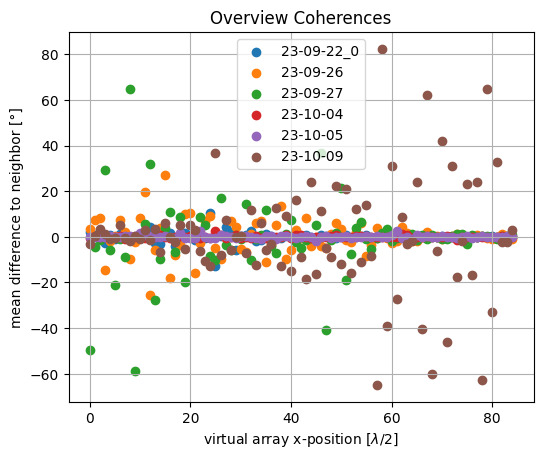

In [28]:
for err, date in zip(mean_errors, dates):
    plt.scatter(range(X-1), err, label=date)
plt.legend()
plt.grid()
plt.ylabel('mean difference to neighbor [°]')
plt.xlabel(r'virtual array x-position [$\lambda /2$]')
plt.title('Overview Coherences')
plt.gcf().set_figwidth(6)
plt.show()

loaded data with shape torch.Size([1022, 192, 92])
plotting channel 191


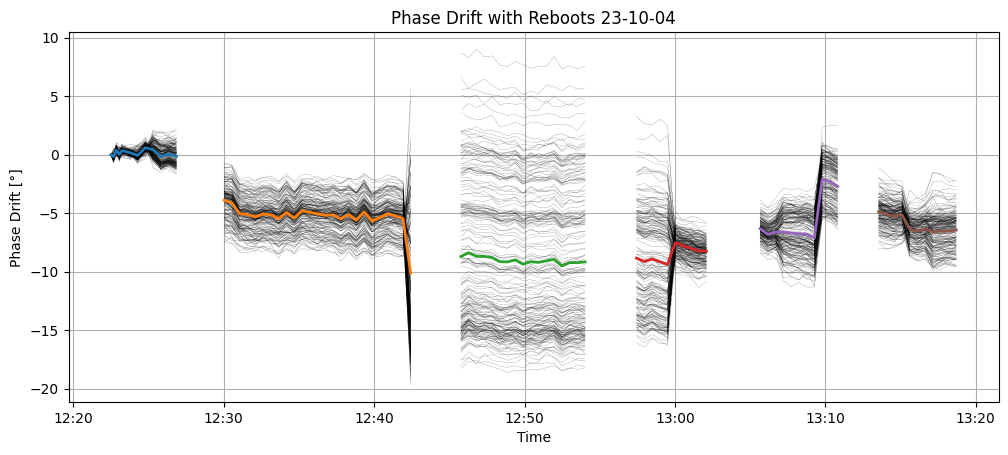

In [21]:
nfft = 2**11
header,time,data,temperature,reboots = load_all(f'/home/dgotzens/recording/23-10-04/', True)
data = tools.rangedata(data, N=nfft)
M,K,L = data.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(data.mean(1),search_idx)
drift = torch.empty((K,L), dtype=torch.cfloat)
for k in range(K):
    # print(f'plotting channel {k}')
    print(f'plotting channel {k}', end='\r')
    drift[k,:] = tools.drift(data[:,k,:], m_refl)
    for r in range(len(reboots)):
        subtime = [t for t in time if reboots[r] < t and (r+1==len(reboots) or t<reboots[r+1])][:-1]
        # print(time.index(min(subtime)),time.index(max(subtime))+1)
        subdrift = drift[k,time.index(min(subtime)):time.index(max(subtime))+1]

        plt.plot(subtime, 180/torch.pi * tools.unwrap(subdrift.angle()), color='k', linewidth=0.1)
        # plt.scatter(time[:-1], 180/torch.pi * drift.angle(), color='k')
for r in range(len(reboots)):
    subtime = [t for t in time if reboots[r] < t and (r+1==len(reboots) or t<reboots[r+1])][:-1]
    subdrift = drift[:,time.index(min(subtime)):time.index(max(subtime))+1]
    plt.plot(subtime, 180/torch.pi * tools.unwrap(subdrift.angle()).mean(0),linewidth=2, label='mean') 
print('')

plt.ylabel('Phase Drift [°]')
# plt.set_ylim(-135,45)
plt.xlabel('Time')
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.grid()
plt.title('Phase Drift with Reboots 23-10-04')
plt.gcf().set_figwidth(12)

/tmp/ipykernel_599099/3871641478.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


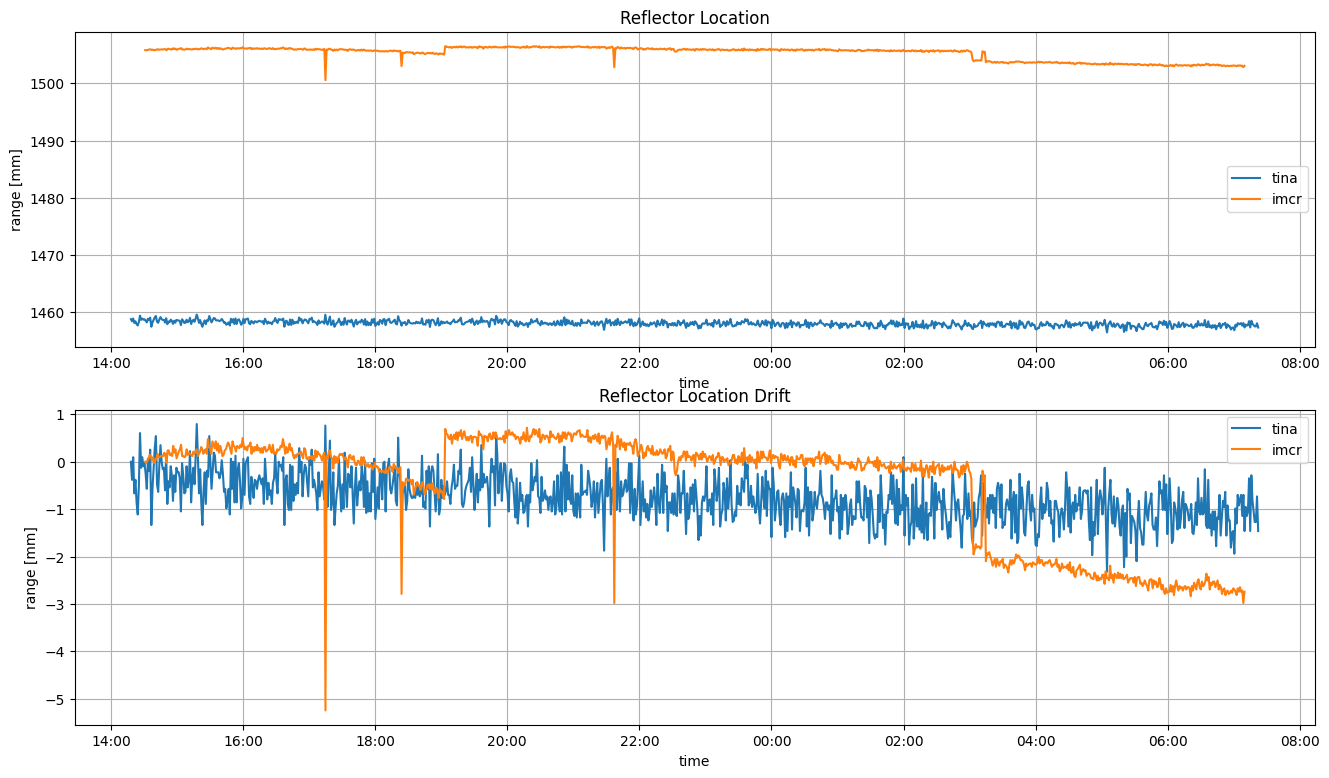

In [ ]:
f, (bottom, top) = plt.subplots(2, figsize=(16,9))
top.plot(t_tina, [1e3*(tina_ranges[m]-tina_ranges[tina_rmax[0]]) for m in tina_rmax], label='tina')
top.plot(t_imcr, [1e3*(imcr_ranges[m]-imcr_ranges[imcr_rmax[0]]) for m in imcr_rmax], label='imcr')

bottom.plot(t_tina, [1e3*(tina_ranges[m]) for m in tina_rmax], label='tina')
bottom.plot(t_imcr, [1e3*(imcr_ranges[m]) for m in imcr_rmax], label='imcr')

top.xaxis.set_major_formatter(tools.hhmm)
top.set_xlabel('time')
top.set_ylabel('range [mm]')
top.legend()
top.grid()
top.set_title('Reflector Location Drift')

bottom.xaxis.set_major_formatter(tools.hhmm)
bottom.set_xlabel('time')
bottom.set_ylabel('range [mm]')
bottom.legend()
bottom.grid()
bottom.set_title('Reflector Location')

f.show()

loaded data with shape torch.Size([1022, 192, 983])
loaded data with shape torch.Size([2048, 768, 992])
converting to real spectrum!


/tmp/ipykernel_599099/726728924.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


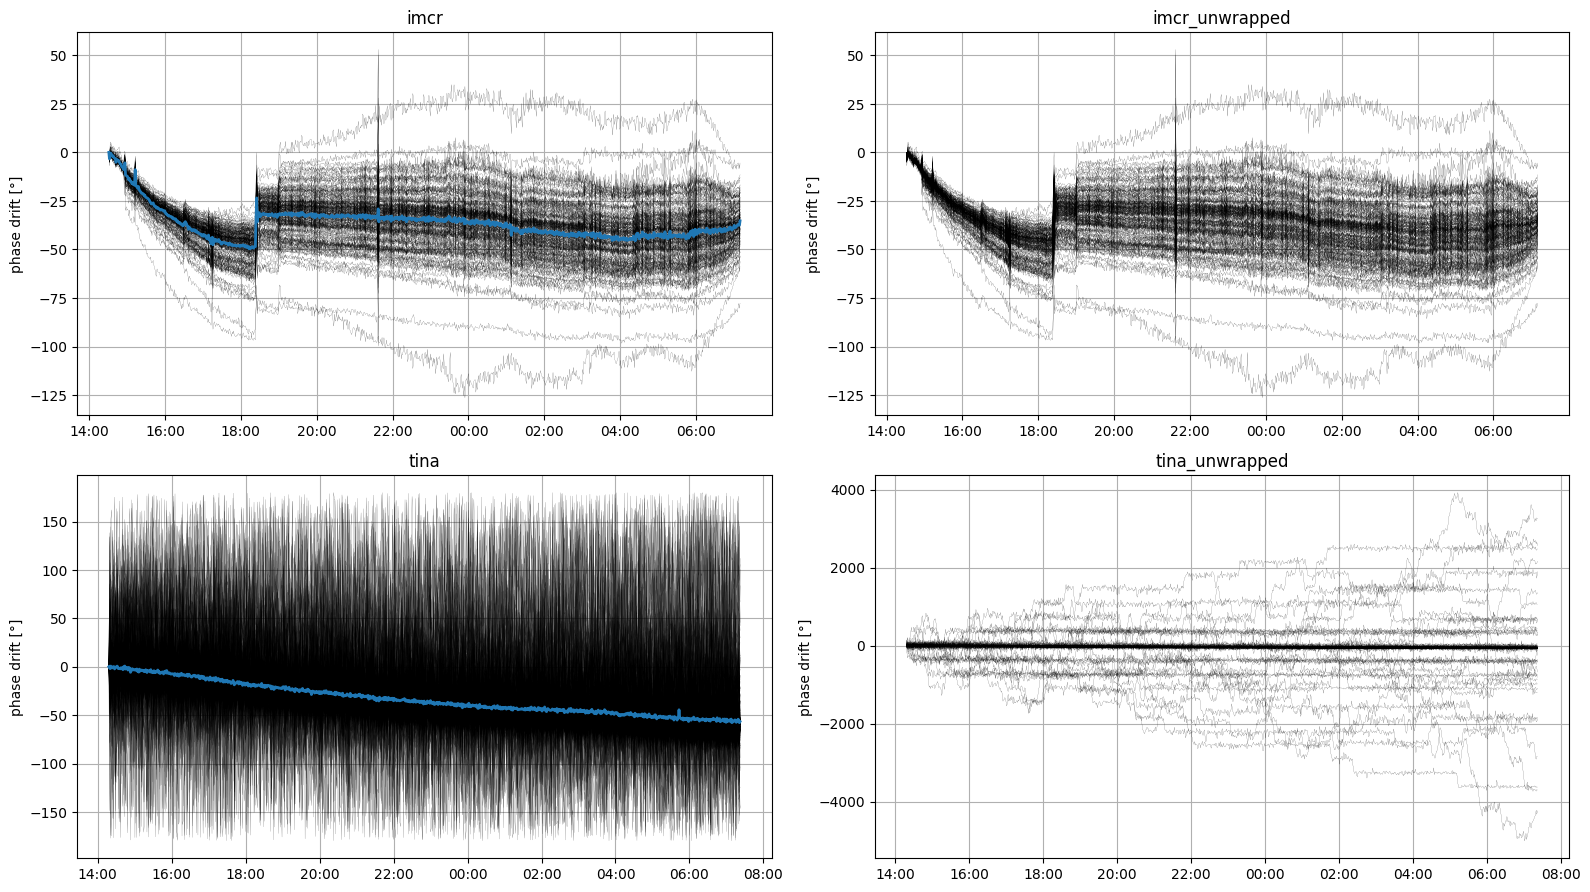

In [ ]:
nfft = 2**11

f,ax = plt.subplots(2,2, figsize=(16,9))

header,time,data,_ = load_all('/home/dgotzens/recording/23-10-09/')
rangedata = tools.rangedata(data, N=nfft)
M,K,L = rangedata.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
drift = torch.empty((K,L))
for k in range(K):
    drift[k,:] = 180/torch.pi*tools.drift(rangedata[:,k,:], m_refl).angle()
    ax[0,0].plot(time,drift[k,:],'k-', linewidth=0.1)
    ax[0,1].plot(time,tools.unwrap(drift[k,:], pi=180),'k-', linewidth=0.1)
ax[0,0].plot(time,drift.mean(0), linewidth=2, label='mean')
ax[0,0].set_title('imcr')
ax[0,1].set_title('imcr_unwrapped')
# top.set_ylim(-2*drift.var().sqrt(), 2*drift.var().sqrt())

header,time,data,_ = load_all('/home/dgotzens/recording/23-10-17_Tina/')
rangedata = tools.rangedata(data, N=nfft)
M,K,L = rangedata.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
drift = torch.empty((K,L))
for k in range(K):
    drift[k,:] = 180/torch.pi*tools.drift(rangedata[:,k,:], m_refl).angle()
    ax[1,0].plot(time,drift[k,:],'k-', linewidth=0.1)
    ax[1,1].plot(time,tools.unwrap(drift[k,:], pi=180),'k-', linewidth=0.1)
ax[1,0].plot(time,drift.mean(0), linewidth=2, label='mean')
ax[1,0].set_title('tina')
ax[1,1].set_title('tina_unwrapped')

for n in range(4):
    ax[n//2, n%2].xaxis.set_major_formatter(tools.hhmm)
    ax[n//2, n%2].set_ylabel('phase drift [°]')
    ax[n//2, n%2].grid()

f.tight_layout(pad=1)
f.show()

In [ ]:
nfft = 2**12
header,time,data,_ = load_all('/home/dgotzens/recording/23-10-04/')
rangedata=tools.rangedata(data,nfft)
M,K,L = data.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
dphase = 180/torch.pi*tools.drift(rangedata, m_refl).angle()

loaded data with shape torch.Size([1022, 192, 92])


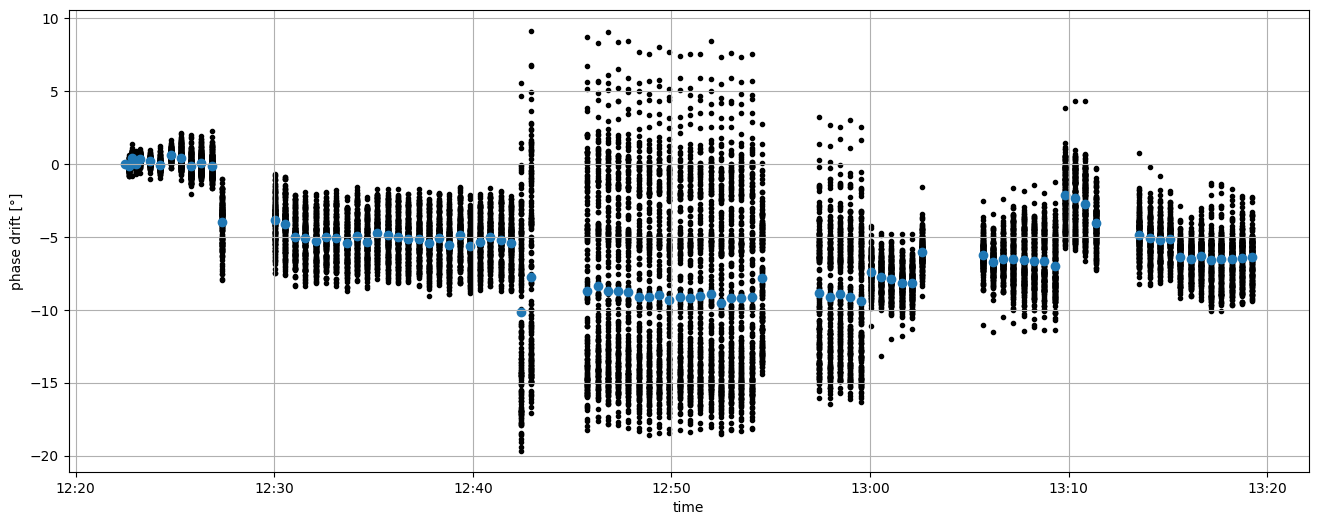

In [ ]:
plt.figure(figsize=(16,6))
for k in range(K):
    plt.scatter(time, dphase[k,:], color='black', marker='.')
plt.scatter(time, dphase.mean(0))
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.ylabel('phase drift [°]')
plt.xlabel('time')
plt.grid()
plt.show()

In [ ]:
nfft = 2**12
header,time,data,temp = load_all('/home/dgotzens/recording/23-10-09/')
rangedata=tools.rangedata(data,nfft)
M,K,L = data.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
phase = 180/torch.pi*tools.unwrap(tools.drift(rangedata, m_refl).angle())
dphase = 60*tools.runavg(tools.deriv(phase), n=40)

loaded data with shape torch.Size([1022, 192, 983])


/tmp/ipykernel_599099/2075910839.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/tmp/ipykernel_599099/2075910839.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


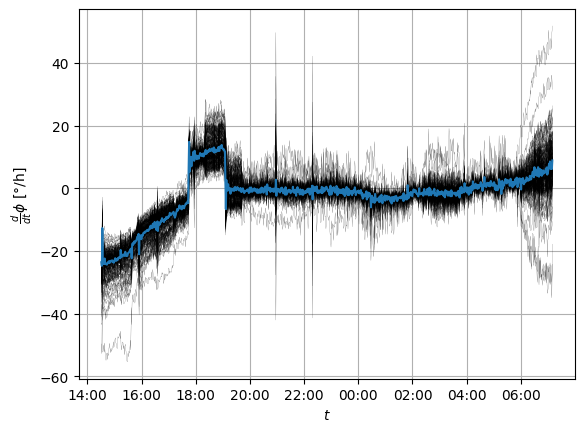

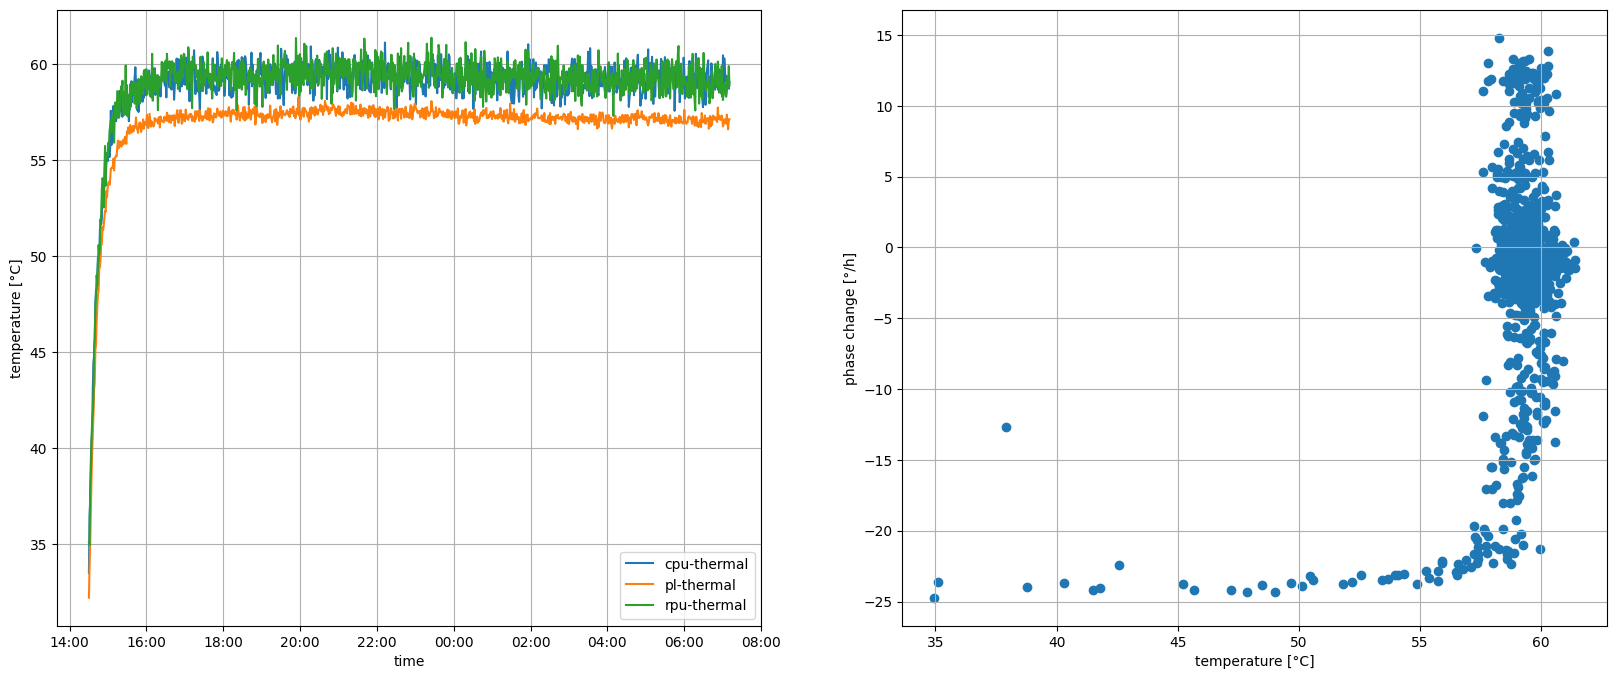

In [ ]:
f, top = plt.subplots(1)
for k in range(K):
    top.plot(time, dphase[k,:], color='black', linewidth=0.1)    
top.plot(time, dphase.mean(0))

top.set_ylabel(r'$\frac{d}{dt} \phi$ [°/h]')
top.set_xlabel(r'$t$')
top.xaxis.set_major_formatter(tools.hhmm)
top.grid()
f.show()
f,(left,right) = plt.subplots(1,2,figsize=(20,8))

for key in temp.keys():
    t = temp[key].keys()
    T = [val/1000 for val in temp[key].values()]
    left.plot(t,T, label=key)

left.xaxis.set_major_formatter(tools.hhmm)
left.set_ylabel('temperature [°C]')
left.set_xlabel('time')
left.legend()
left.grid()

right.scatter([val/1000 for l, val in enumerate(temp['rpu-thermal'].values()) if l<L], dphase.mean(0))
right.set_xlabel('temperature [°C]')
right.set_ylabel('phase change [°/h]')
right.grid()

f.show()
